In [118]:
import numpy as np
import pandas as pd 
import pandas_profiling
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

In [2]:
df_aisles = pd.read_csv("./data/aisles/aisles.csv")
df_departments = pd.read_csv("./data/departments/departments.csv")
df_order_products = pd.read_csv("./data/order_products/order_products.csv")
df_orders = pd.read_csv("./data/orders/orders.csv")
df_products = pd.read_csv("./data/products/products.csv")

In [17]:
df_orders

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,1,2,8,NaN
1,2398795,1,2,3,7,15.0
2,473747,1,3,3,12,21.0
3,2254736,1,4,4,7,29.0
4,431534,1,5,4,15,28.0
...,...,...,...,...,...,...
3421078,2266710,206209,10,5,18,29.0
3421079,1854736,206209,11,4,10,30.0
3421080,626363,206209,12,1,12,18.0
3421081,2977660,206209,13,1,12,7.0


In [18]:
df_order_products

,order_id,product_id,add_to_cart_order
0,2,33120,1
1,2,28985,2
2,2,9327,3
3,2,45918,4
4,2,30035,5
...,...,...,...
33819101,3421063,14233,3
33819102,3421063,35548,4
33819103,3421070,35951,1
33819104,3421070,16953,2


In [3]:
df1 = pd.merge(df_orders, df_order_products, on="order_id", how="inner")
df2 = pd.merge(df1, df_products, on="product_id")
df3 = pd.merge(df2, df_aisles, on="aisle_id")
df_all = pd.merge(df3, df_departments, on="department_id")
df_all

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,product_name,aisle_id,department_id,aisle,department
0,2539329,1,1,2,8,NaN,196,1,Soda,77,7,soft drinks,beverages
1,2398795,1,2,3,7,15.0,196,1,Soda,77,7,soft drinks,beverages
2,473747,1,3,3,12,21.0,196,1,Soda,77,7,soft drinks,beverages
3,2254736,1,4,4,7,29.0,196,1,Soda,77,7,soft drinks,beverages
4,431534,1,5,4,15,28.0,196,1,Soda,77,7,soft drinks,beverages
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33819101,2939884,130327,3,1,13,0.0,27414,5,Organic Emmer Farro,68,10,bulk grains rice dried goods,bulk
33819102,3267360,150683,1,5,16,NaN,27414,13,Organic Emmer Farro,68,10,bulk grains rice dried goods,bulk
33819103,414077,159238,9,6,12,8.0,27414,1,Organic Emmer Farro,68,10,bulk grains rice dried goods,bulk
33819104,813243,171675,13,2,6,13.0,27414,34,Organic Emmer Farro,68,10,bulk grains rice dried goods,bulk


In [39]:
df_all.head(20)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,product_name,aisle_id,department_id,aisle,department
0,2539329,1,1,2,8,NaN,196,1,Soda,77,7,soft drinks,beverages
1,2398795,1,2,3,7,15.0,196,1,Soda,77,7,soft drinks,beverages
2,473747,1,3,3,12,21.0,196,1,Soda,77,7,soft drinks,beverages
3,2254736,1,4,4,7,29.0,196,1,Soda,77,7,soft drinks,beverages
4,431534,1,5,4,15,28.0,196,1,Soda,77,7,soft drinks,beverages
5,3367565,1,6,2,7,19.0,196,1,Soda,77,7,soft drinks,beverages
6,550135,1,7,1,9,20.0,196,1,Soda,77,7,soft drinks,beverages
7,3108588,1,8,1,14,14.0,196,2,Soda,77,7,soft drinks,beverages
8,2295261,1,9,1,16,0.0,196,4,Soda,77,7,soft drinks,beverages
9,2550362,1,10,4,8,30.0,196,1,Soda,77,7,soft drinks,beverages


### Q1

In [112]:
df = df_all[["user_id", 'order_number']]
df['max_number'] = df.groupby('user_id')['order_number'].transform('max')
df

/Users/Mark/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,user_id,order_number,max_number
0,1,1,11
1,1,2,11
2,1,3,11
3,1,4,11
4,1,5,11
...,...,...,...
33819101,130327,3,48
33819102,150683,1,6
33819103,159238,9,52
33819104,171675,13,42


/Users/Mark/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

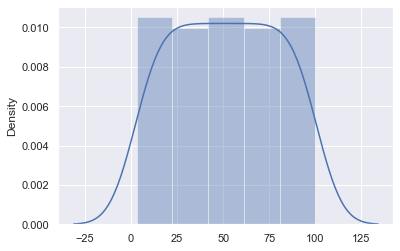

In [122]:
max_number = df.max_number.unique()
sns.distplot(max_number)

### Q2

In [13]:
df_all.department.mode()

0    produce
dtype: object

In [14]:
df_all.aisle.mode()

0    fresh fruits
dtype: object

In [12]:
"""Customers' favorite departments and Aisles is produce and fresh fruits"""

"Customers' favorite departments and Aisles is produce and fresh fruits"

### Q3

In [45]:
labels = df_all.department.unique().tolist()
best_aisle = []
for i in labels:
    df = df_all[df_all["department"] == i][['order_number', 'aisle', 'department']]
    best_aisle.append(df.loc[df.order_number.idxmax()]['aisle'])
    
print(best_aisle)

['soft drinks', 'soy lactosefree', 'popcorn jerky', 'paper goods', 'fresh fruits', 'cereal', 'spreads', 'lunch meat', 'frozen meals', 'oral hygiene', 'packaged poultry', 'asian foods', 'breakfast bakery', 'canned meat seafood', 'instant foods', 'red wines', 'dog food care', 'baby food formula', 'other', 'missing', 'bulk dried fruits vegetables']


In [46]:
print(labels)

['beverages', 'dairy eggs', 'snacks', 'household', 'produce', 'breakfast', 'pantry', 'deli', 'frozen', 'personal care', 'meat seafood', 'international', 'bakery', 'canned goods', 'dry goods pasta', 'alcohol', 'pets', 'babies', 'other', 'missing', 'bulk']


In [48]:
best_selling_Aisles = pd.DataFrame({'department':labels,'best_aisle':best_aisle})
best_selling_Aisles

,department,best_aisle
0,beverages,soft drinks
1,dairy eggs,soy lactosefree
2,snacks,popcorn jerky
3,household,paper goods
4,produce,fresh fruits
5,breakfast,cereal
6,pantry,spreads
7,deli,lunch meat
8,frozen,frozen meals
9,personal care,oral hygiene


### Q4

In [11]:
X = []
for i in df_all['department'].unique().tolist():
    X.append(df_all[df_all["department"] == i]['order_number'].sum())
    
print(X)

[48292820, 99447482, 51655845, 12151378, 176103461, 12384615, 32426214, 18066442, 36160893, 7574482, 11749748, 4620539, 21048641, 17989899, 14392589, 2423859, 1568954, 8480976, 655924, 1738204, 725731]


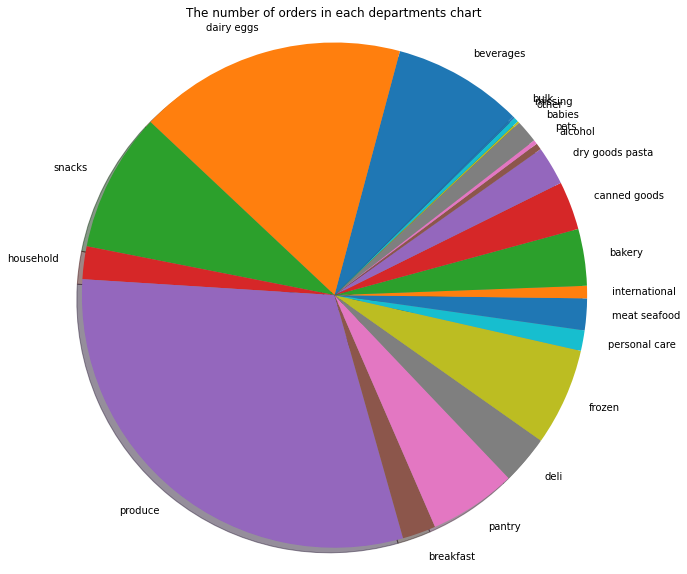

In [25]:
labels = df_all.department.unique().tolist()


plt.subplots(nrows=1, ncols=1, figsize=(10,10))
plt.pie(X, labels=labels, shadow=True, startangle=45) 
plt.axis('equal')
plt.title("The number of orders in each departments chart")
  
 
plt.show() 